# Función Alfa-Beta 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import sympy as sp

# Símbolos
r, b, alpha, mu = sp.symbols('r b alpha mu', real=True)

In [6]:
def f(r2, b, alpha, mu):

    sqrt = np.sqrt

    E=-7 + 144*b
    B = 49 + 54*b*(-21 + sqrt(21)*sqrt(E))
    D1 = -7*sqrt(21) + 162*b*(sqrt(21) - sqrt(-7 + 144*b))
    D2 = -7*7**(1/3) + 108*7**(1/3)*b + B**(2/3)

    term1 = (
        -(46656/7)*b**3*(-7 + 162*b)*r2**6*alpha**6
        + (629856*b**3*sqrt(E)*B**(4/3)*r2**2*alpha**5*mu)
        /(7**(1/3)*D1*D2)
    )

    term2 = (69984/7)*b**3*r2**2*alpha**(9/2)*sqrt(
        (3888/7)*b**2*(E)*r2**8*alpha**3
        + (
            12*7**(2/3)*sqrt(E)*(-7 + 162*b)*B**(4/3)
            *r2**4*alpha**2*mu
        )/( (-D1)*D2 )
        + (
            567*7**(1/3)*(E)*B**(8/3)*alpha*mu**2
        )/( (-D1)**2 * D2**2 )
    )

    big_term = (term1 + term2)**(1/3)

    result = (
        1
        + r2**2
        + (36*(7 - 108*b)*b*r2**4*alpha**2)/(7*big_term)
        + (1/(36*b*alpha**2))*big_term
    )

    return result

C:\Users\Danito\AppData\Local\Temp\ipykernel_5956\1616284430.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("turbo")   # O "viridis", "plasma", "rainbow"
C:\Users\Danito\AppData\Local\Temp\ipykernel_5956\235069187.py:27: RuntimeWarning: invalid value encountered in power
  big_term = (term1 + term2)**(1/3)
C:\Users\Danito\AppData\Local\Temp\ipykernel_5956\235069187.py:32: RuntimeWarning: divide by zero encountered in divide
  + (36*(7 - 108*b)*b*r2**4*alpha**2)/(7*big_term)
C:\Users\Danito\AppData\Local\Temp\ipykernel_5956\235069187.py:32: RuntimeWarning: invalid value encountered in divide
  + (36*(7 - 108*b)*b*r2**4*alpha**2)/(7*big_term)


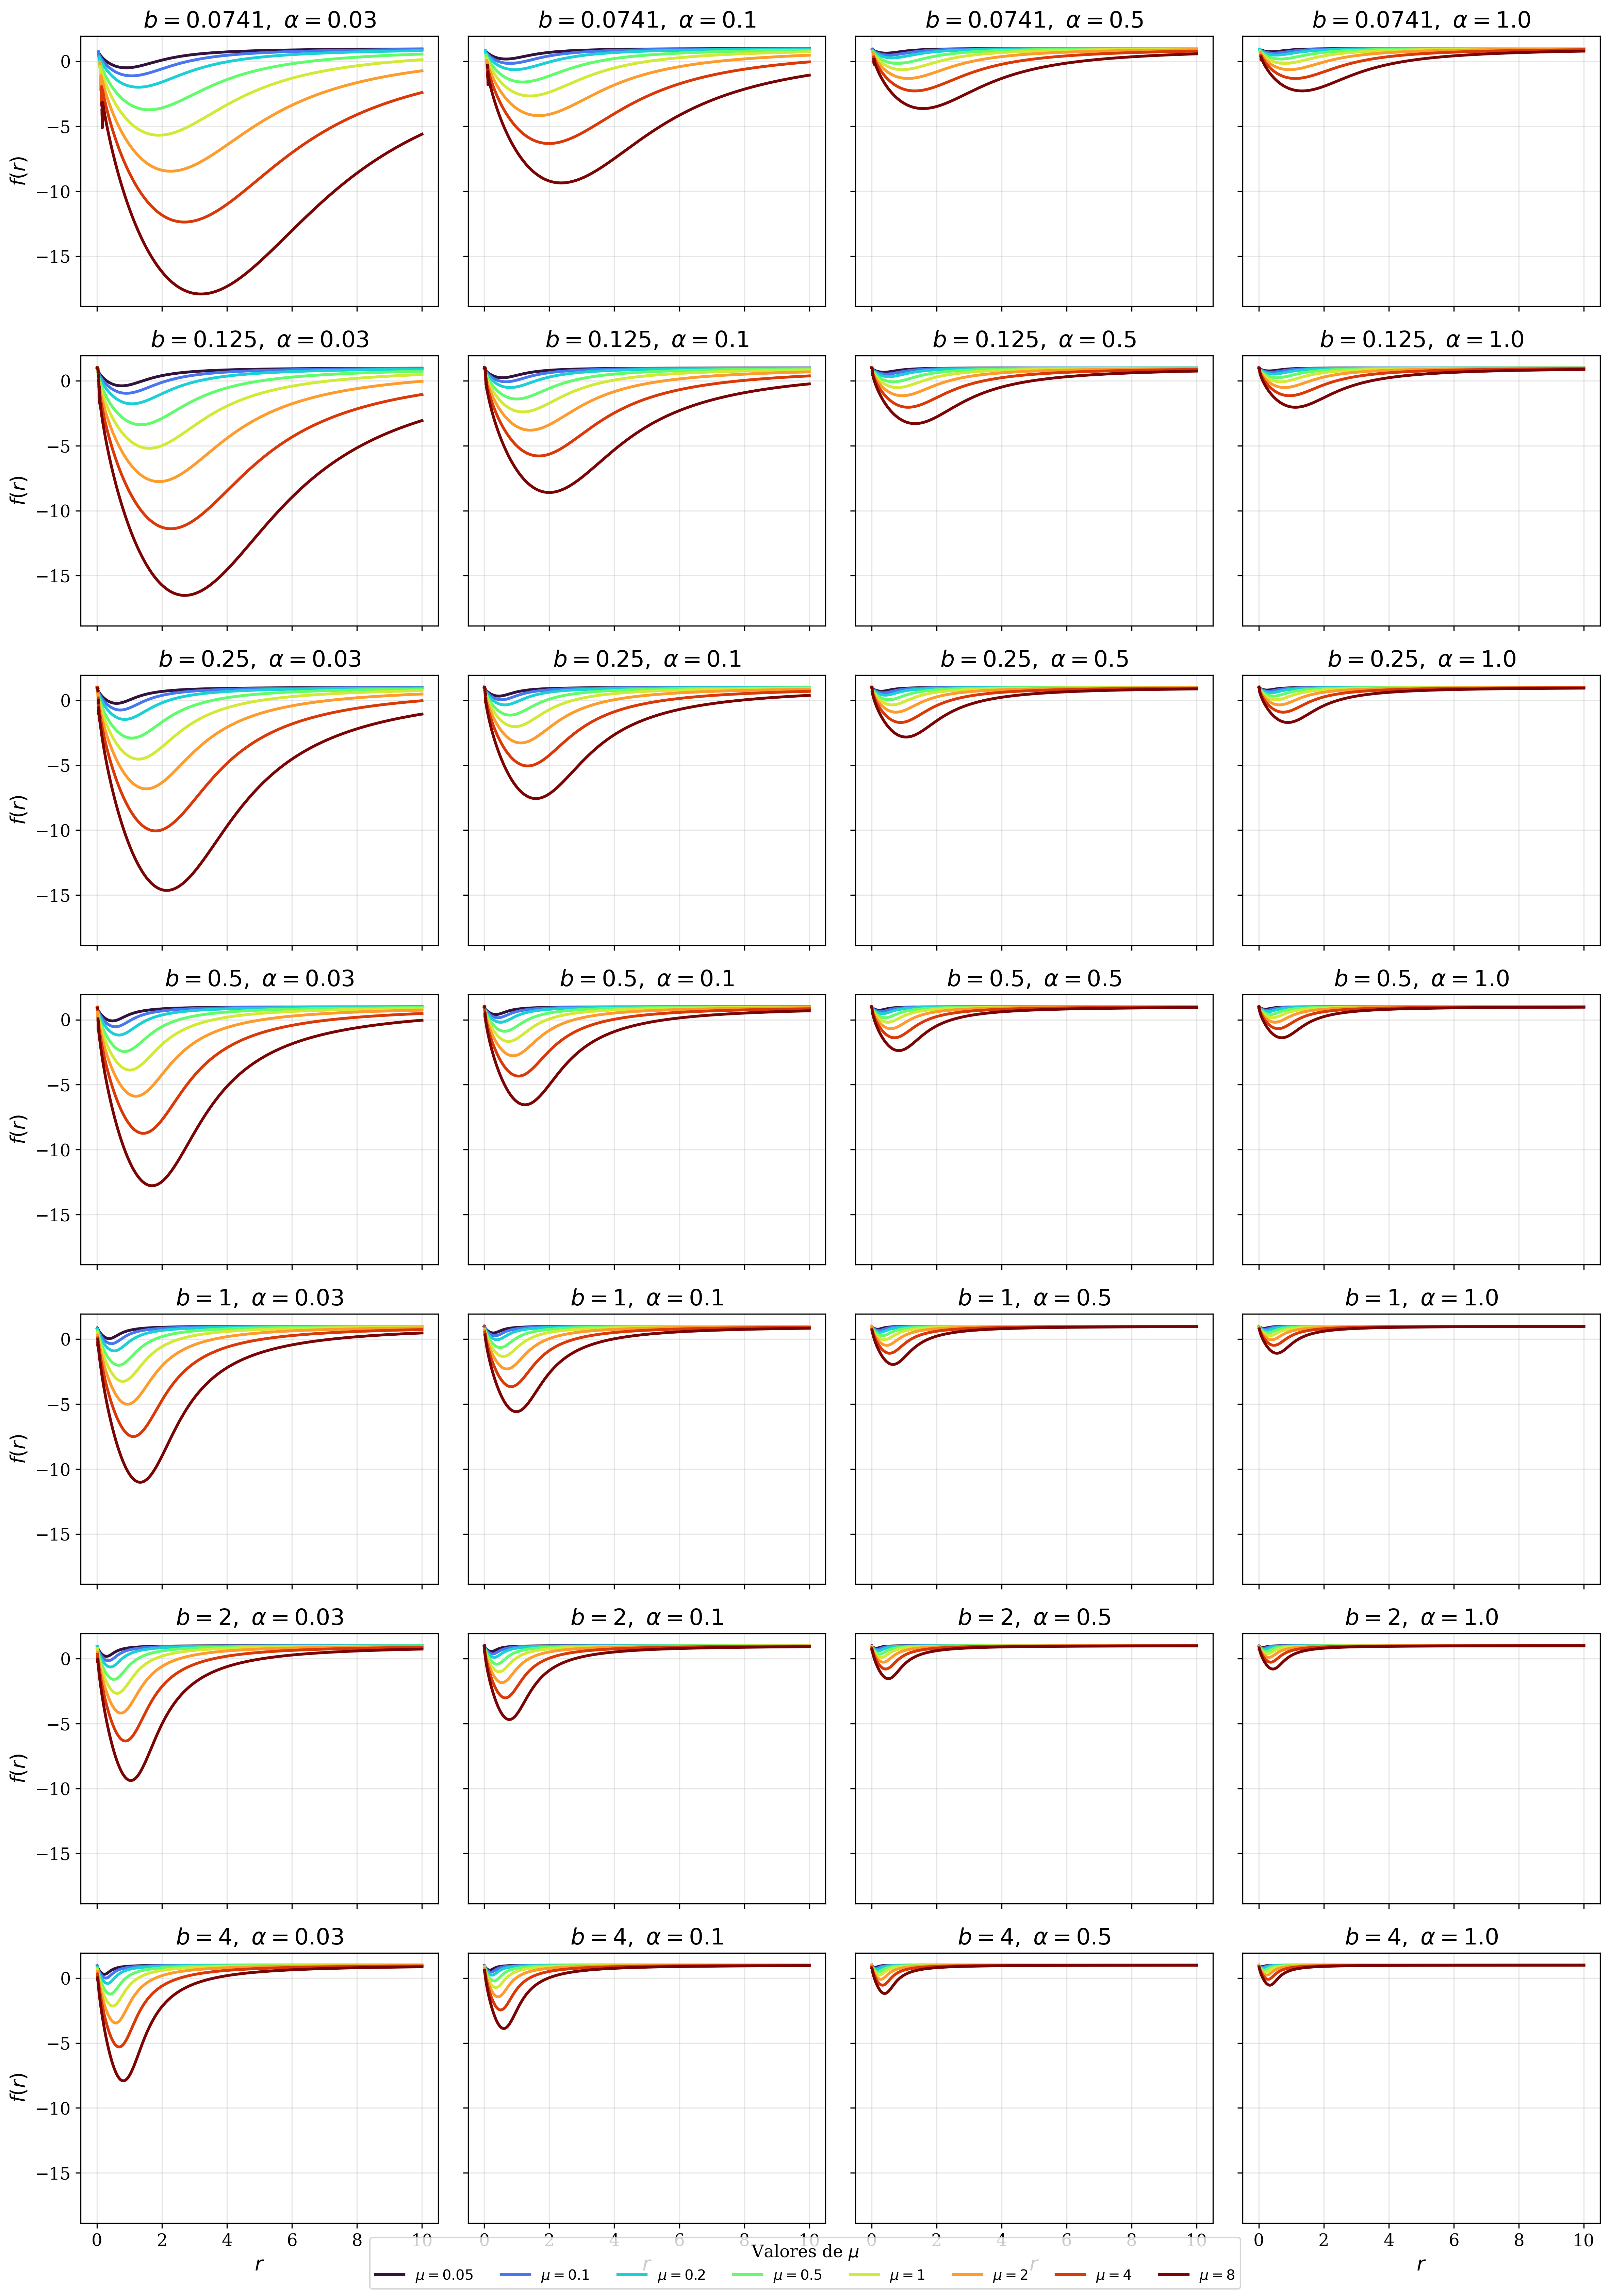

In [29]:
r_vals = np.linspace(0, 10, 10000)
mu_list = [0.05, 0.1, 0.2, 0.5, 1, 2, 4, 8]
b_list = [round(8/108,4), 1/8, 1/4,1/2,1,2,4]
alpha_list = [0.03,0.1, 0.5, 1.0]

plt.rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "figure.dpi": 300,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 10,
    "lines.linewidth": 2
})

# Colormap profesional tipo arcoiris
cmap = get_cmap("turbo")   # O "viridis", "plasma", "rainbow"

# Crear grilla de subplots
fig, axes = plt.subplots(
    nrows=len(b_list),
    ncols=len(alpha_list),
    figsize=(4 * len(alpha_list), 3.5 * len(b_list)),
    sharex=True,
    sharey=True
)

# Asegurar que axes siempre sea 2D
axes = np.atleast_2d(axes)

for i, b in enumerate(b_list):
    for j, alpha in enumerate(alpha_list):
        ax = axes[i, j]

        for k, mu in enumerate(mu_list):
            color = cmap(k / (len(mu_list) - 1))
            ax.plot(
                r_vals,
                f(r_vals, b, alpha, mu),
                color=color
            )

        ax.set_title(fr"$b={b},\ \alpha={alpha}$")
        ax.grid(True, alpha=0.3)

        if i == len(b_list) - 1:
            ax.set_xlabel("$r$")
        if j == 0:
            ax.set_ylabel("$f(r)$")

# Leyenda común
handles = [
    plt.Line2D([0], [0], color=cmap(k/(len(mu_list)-1)), lw=2)
    for k in range(len(mu_list))
]
labels = [fr"$\mu={mu}$" for mu in mu_list]

fig.legend(
    handles, labels,
    title="Valores de $\mu$",
    loc="lower center",
    ncol=len(mu_list),
    frameon=True
)

plt.savefig("alfa-beta.png", dpi=300, bbox_inches="tight")
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()